## Social context modulates processing of autogenous and exogenous song in male zebra finch NCM.
### Daniel J. Pollak, Daniel M. Vahaba, Matheus Maceda-Lima, Luke Remage-Healey

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
plt.rcParams['figure.figsize'] = [12, 6]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import seaborn as sns

import pandas as pd
import numpy as np
import numba
import scipy.stats as stats

import tqdm.notebook as tqdm
import matplotlib.image as mpimg
# import pingouin as pg

from figure_helpers import *

In [2]:
# Load your data
(fig2_db, sel_df, fig3all_db, fig3_db, t1df, t2df, database, soc_context_df, df) = load_data()
# Used for the very last subfig: d'
fig3_db_agg = fig3_db.groupby(['key','treatments']).agg(np.mean).reset_index()
# Used for all but last subfig
fig3all_db_agg = fig3all_db.groupby(['key','treatments']).agg(np.mean).reset_index()


# Figure 2
Z-score formula

$$
Z=\frac{mean(S)-mean(B)}{\sqrt{var(S) + var(B) - 2 * cov(S,B)}}
$$

If you get `ValueError: zero-size array to reduction operation minimum which has no identity`
it may be due to how matplotlib 3.3.1 breaks seaborn.

https://stackoverflow.com/questions/63443583/seaborn-valueerror-zero-size-array-to-reduction-operation-minimum-which-has-no#63640434
https://github.com/mwaskom/seaborn/issues/2194

In [3]:
fig3all_db

,key,SSArat,treatments,hemisphere,broad,stimtype,vocZ,PIRZ,vocFR,PIRFR,BL_FR
0,DJPComb_mdx 11 1 18_181101_221336_Kilosort&69&...,0.083333,T1,R,1,BOS,0.408253,0.150906,6.604777,4.266667,3.244444
1,DJPComb_mdx 11 1 18_181101_221336_Kilosort&71&...,1.666667,T1,R,0,BOS,0.281144,-0.134941,3.103450,1.155556,1.666667
2,DJPComb_mdx 11 17 18 habit_181107_204711_Kilos...,1.333333,T1,R,1,BOS,0.611192,-0.076774,1.133953,0.133333,0.200000
3,DJPComb_mdx 11 17 18 habit_181107_204711_Kilos...,1.000000,T1,R,0,BOS,0.286433,0.285125,0.775862,0.933333,0.400000
4,DJPComb_mdx 11 17 18 habit_181107_204711_Kilos...,NaN,T1,R,1,BOS,0.034011,0.153549,0.119363,0.266667,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
307,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,2.062923,T2,L,1,BOS_REV,0.510808,0.549311,2.734816,3.866667,1.633333
308,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,0.969572,T2,L,0,BOS_REV,1.076291,1.082579,29.702729,31.200000,17.500000
309,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,0.707941,T2,L,1,BOS_REV,1.084413,0.689754,11.803352,13.333333,6.733333
310,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,1.016508,T2,L,0,BOS_REV,1.711235,1.877698,23.748465,34.400000,11.033333


In [4]:
np.unique([val.split("DJPComb_")[1][:3] for val in fig2_db.key.values])
np.unique([val.split("DJPComb_")[1][:3] for val in sel_df['keys'].values])
np.unique([val.split("DJPComb_")[1][:3] for val in fig3all_db.key.values])


array(['mdx', 'mdy'], dtype='<U3')

c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\catego

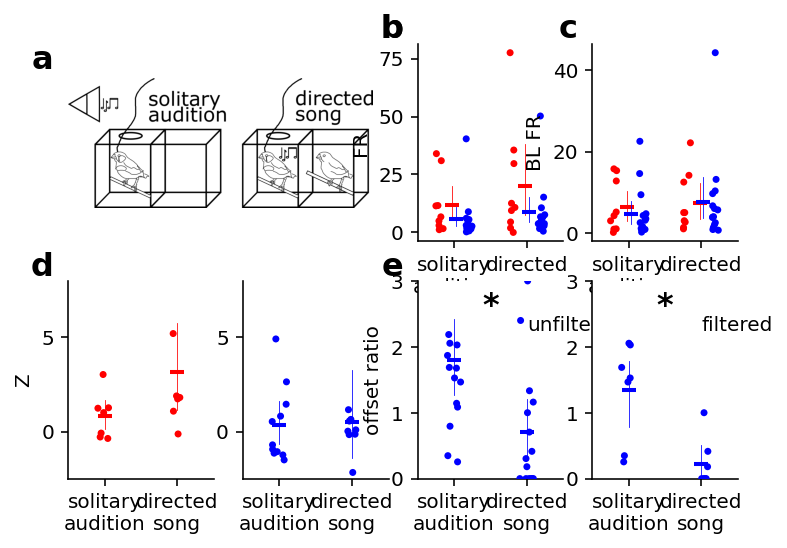

In [5]:
# Subfig a
ax = plt.subplot(221)
ax.imshow(mpimg.imread("./Fig2_contingencies.png"))
ax.axis("off")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0] - (xlim[1]-xlim[0])*0.05,
        ylim[1] + (ylim[1]-ylim[0])*0.25,
        "a", fontsize=16, fontweight='bold',
        va='top', ha='right')

# Subfig b
xticklabs = ['solitary\naudition', 'directed\nsong']

ax = maineffect(fig2_db, 'FR', plt.subplot(243))
# ax.set_ylim((-1, 30))
organize_axes(ax, 'FR', 'b', xticklab=xticklabs)

organize_axes(ax, 'FR', 'b', xticklab=xticklabs)

# Subfig c
ax = maineffect(fig2_db, 'BL_FR', plt.subplot(244))
# ax.set_ylim((-1, 30))
organize_axes(ax, 'BL FR', 'c', xticklab=xticklabs)

# Subfig d
axes = interaction(fig2_db, 'Z', (plt.subplot(245), plt.subplot(246)))
[axes[axeInd].set_ylim((-2.5, 8)) for axeInd in range(len(axes))]
organize_axes(axes[0], 'Z', 'd', xticklab=xticklabs)
organize_axes(axes[1], '', '', xticklab=xticklabs)

# Subfig e
axis = maineffect(fig2_db[fig2_db['broad']==1],
                  'PIRrat', plt.subplot(247), pal=['b'])
axis.set_ylim((0, 3))
organize_axes(axis, 'offset ratio', 'e', sig_apostrophes='*',
              xticklab=xticklabs, annotation='unfiltered')

axis = maineffect(fig2_db[(fig2_db['SSArat']>0.6) & (fig2_db['broad']==1)],
                  'PIRrat', plt.subplot(248), pal=['b'])

axis.set_ylim((0, 3))
organize_axes(axis, '', '', sig_apostrophes="*", xticklab=xticklabs, annotation='filtered')

# Figure 3

$d'$ formula


$$
d'_{A-B} = \frac{2(RS[STIM_A]-RS[STIM_B])}{\sqrt{var(A)+var(B)}}
$$


$$
RS[STIM_X]=\sum_{i}^{N}{ \frac{S_i-B_i}{N}}
$$

In [6]:
fig3_db_agg

,key,treatments,SSArat,broad,vocd,PIRd,vocZ,PIRZ,vocFR,PIRFR,BL_FR
0,DJPComb_mdx 11 1 18_181101_221336_Kilosort&69&...,T1,0.083333,1,0.408069,-0.236479,0.113341,-0.088741,1.419099,-1.274074,-0.503704
1,DJPComb_mdx 11 1 18_181101_221336_Kilosort&69&...,T2,0.083333,1,1.110460,-0.441083,0.584824,-0.193621,4.270559,-0.918519,0.192593
2,DJPComb_mdx 11 1 18_181101_221336_Kilosort&71&...,T1,1.666667,0,0.190417,-1.044623,0.034802,-0.220769,0.689655,-1.511111,0.133333
3,DJPComb_mdx 11 1 18_181101_221336_Kilosort&71&...,T2,1.666667,0,1.059537,-0.934316,0.554492,-0.166761,2.864723,-1.066667,-0.066667
4,DJPComb_mdx 11 17 18 habit_181107_204711_Kilos...,T1,1.333333,1,0.459956,-1.963193,0.211774,-0.366739,0.278515,-0.977778,-0.188889
...,...,...,...,...,...,...,...,...,...,...,...
73,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,T2,0.707941,1,0.427910,-1.977795,0.170434,-0.705838,4.762414,-5.688889,2.588889
74,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,T1,1.016508,0,5.275801,-2.409895,3.231662,-0.834155,33.519413,-12.577778,-1.055556
75,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,T2,1.016508,0,1.270416,-2.609944,0.542182,-1.116706,12.615996,-9.688889,4.211111
76,DJPComb_mdy 12 4 18 new idea trial 1_181204_18...,T1,inf,1,1.306574,-0.903841,0.885326,-0.206602,1.309746,-0.400000,0.200000


c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)
c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\seaborn\catego

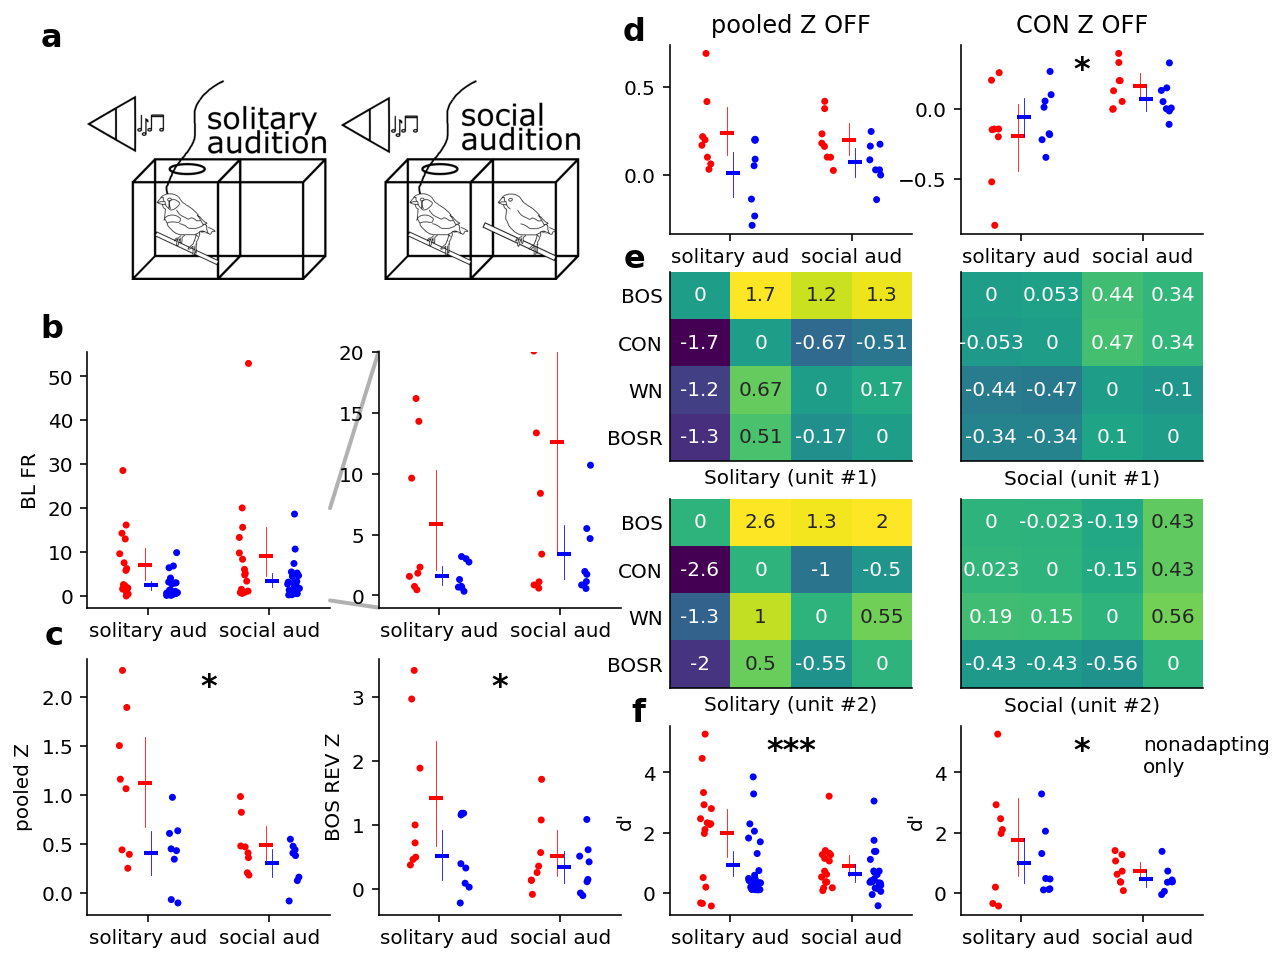

In [7]:
def pad_img(img, width):
    padded = np.dstack(tuple([np.pad(img[:,:,i],width) for i in range(4)]))

    return padded[:-width,width:,:]


xticklabs=['solitary aud', 'social aud']
plt.figure(figsize=(10,8))
# Subfig a
ax = plt.subplot(321)
padded_img = pad_img(mpimg.imread("./Fig3_contingencies.png"), 50)
ax.imshow(padded_img)
ax.axis("off")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0] - (xlim[1]-xlim[0])*0.05,
        ylim[1] + (ylim[1]-ylim[0])*0.2,
        "a", fontsize=16, fontweight='bold',
        va='top', ha='right')

# Subfig b
ax_a1 = maineffect(fig3all_db_agg, 'BL_FR', plt.subplot(345))
organize_axes(ax_a1, 'BL FR', 'b', sig_apostrophes="", xticklab=xticklabs)


# Again, but with constrained y axis
ax_a2 = maineffect(fig3all_db_agg[fig3all_db_agg['SSArat']>0.6], 'BL_FR', plt.subplot(346))
organize_axes(ax_a2, '', '', sig_apostrophes="", annotation="",xticklab=xticklabs)
ax_a2.set_ylim([-1,20])

# Finally, connector patch.
# Top
conTop = ConnectionPatch(
    xyA=(ax_a1.get_xlim()[1], 20), coordsA=ax_a1.transData,
    xyB=(ax_a2.get_xlim()[0], 20), coordsB=ax_a2.transData)
# Bottom
conBottom = ConnectionPatch(
    xyA=(ax_a1.get_xlim()[1], -1), coordsA=ax_a1.transData,
    xyB=(ax_a2.get_xlim()[0], -1), coordsB=ax_a2.transData)
for con in [conTop, conBottom]:
    con.set_alpha(0.3)
    con.set_linewidth(2)

ax_a1.add_artist(conTop)
ax_a2.add_artist(conBottom)

# Subfig c
# ax_c = plt.subplot(349)
# sns.catplot(
#     data=fig3all_db.loc[fig3all_db['SSArat']>0.6,:], x="treatments",
#     y="vocFR", col="broad", kind='point', hue="stimtype",  dodge=True, ax=ax_c, sharey=False)

# organize_axes(ax, 'FR', 'c', xticklab=xticklabs, annotation='filtered')

ax = maineffect(fig3all_db_agg[fig3all_db_agg['SSArat']>0.6], 'vocZ', plt.subplot(3,4,9), pal=['r', 'b'])
organize_axes(ax, 'pooled Z', 'c', sig_apostrophes="*", xticklab=xticklabs, annotation='')

ax = maineffect(fig3all_db.loc[(fig3all_db['SSArat']>0.6) & (fig3all_db['stimtype']=="BOS_REV"),:], 'vocZ', plt.subplot(3,4,10), pal=['r', 'b'])
organize_axes(ax, 'BOS REV Z', '', sig_apostrophes="*", xticklab=xticklabs, annotation='')

# Subfig d
ax = maineffect(fig3all_db_agg[fig3all_db_agg['SSArat']>0.6], 'PIRZ', plt.subplot(4,4,3), pal=['r', 'b'])
organize_axes(ax, '', 'd', sig_apostrophes="", xticklab=xticklabs, annotation='')
ax.set_title("pooled Z OFF")
ax = maineffect(fig3all_db.loc[(fig3all_db['SSArat']>0.6) & (fig3all_db['stimtype']=="CON"),:], 'PIRZ', plt.subplot(4,4,4), pal=['r', 'b'])
organize_axes(ax, '', '', sig_apostrophes="*", xticklab=xticklabs, annotation='')
ax.set_title("CON Z OFF")

# Subfig d
# Choosing units to use. Multiples of four, so the fourth and the eighth
unitInds = [16, 32]

# t1 == solitary, t2 == social
t1axes = [plt.subplot(4, 4, 7 + i * 4) for i in range(2)] # plus 0 or 2
t2axes = [plt.subplot(4, 4, 8 + i * 4) for i in range(2)] # plus 0 or 2
heatmaps(t1df, t2df, unitInds, t1axes, t2axes)

for i in range(2):
    t1ax = t1axes[i]
    t2ax = t2axes[i]

    # Set subfigure letter
    subfig_lab = 'e' if i == 0 else ''

    # Set yticklabels
    plt.sca(t1ax)
    organize_axes(t1ax, '', subfig_lab, '', yticklabs=['BOS','CON','WN','BOSR'])
    plt.xlabel(f'Solitary (unit #{i+1})')

    plt.sca(t2ax)
    organize_axes(t2ax, '', '', '', yticklabs=None)
    plt.xlabel(f'Social (unit #{i+1})')

# Subfig e
# Out of order so things layer properly on y axis labels
ax = maineffect(fig3_db_agg, 'vocd', plt.subplot(4,4,15))
organize_axes(ax, 'd\'', 'f', sig_apostrophes='***',annotation="", xticklab=xticklabs)

ax = maineffect(fig3_db_agg.loc[fig3_db_agg["SSArat"] > 0.6], 'vocd', plt.subplot(4,4,16))
organize_axes(ax, 'd\'', '', sig_apostrophes='*',annotation="nonadapting\nonly", xticklab=xticklabs)

# Figure 4
Define arguments for seaborn's replot functionDefine arguments for seaborn's replot function

In [8]:
gridkw = dict(height_ratios=[3, 2])
relplot_args = {
    'kind':'line',
    'x':'frequency',
    'col':'stimulus',
    'hue':'period',
    'ci':'sd'
}

Take the logarithm of the power. Since the power spreads across several orders of magnitude, this is a way to transform them onto the same order of magnitude. It sacrifices precision for large-scale patterns

In [9]:
soc_context_df['log power'] = np.log(soc_context_df['power'])
database['log power'] = np.log(database['power'])
df['log power'] = np.log(df['power'])

Pivot the data for easier comparison

In [10]:
# First step is to put period into its own columns and then make two more columns of differences.
# I'm leaving out channel so it gets averaged out... I hope that is reasonable
piv_df = df.pivot_table(
    values='log power', columns='period', index=['subject','frequency','stimulus','stimulus_index']
).reset_index()

In [11]:
piv_df['pre_compare'] = piv_df['during'] - piv_df['pre']
piv_df['post_compare'] = piv_df['during'] - piv_df['post']
piv_df['baseline_compare'] = piv_df['post'] - piv_df['pre']

Double check data have no nans

In [12]:
piv_df.loc[np.any(piv_df.isna(), axis=1),:].head()
np.any(piv_df.isna())
piv_df = piv_df.dropna()

### Define hypothesis test
**Null hypothesis**: Baseline and effect distributions are the same. Independent for each frequency.

**Test statistic**: Mean difference between baseline and effect

**Simulation procedure**: Permutation test, for n baseline values and m effect values, we concatenate and permute them 1000 times, and take the mean of the first n and last m values. If the difference is at least as extreme as the empirical difference less than 5% of the time, we reject the null hypothesis for that frequency, subject, and stimulus (recall these tests are independent).

**Significance level**: 5%

In [13]:
# Taken from Justin Bois's course materials at
# https://bebi103a.github.io/lessons/16/hacker_nhst.html
@numba.njit
def draw_perm_sample(x, y):
    """Generate a permutation sample."""
    concat_data = np.concatenate((x, y))
    np.random.shuffle(concat_data)

    return concat_data[:len(x)], concat_data[len(x):]


@numba.njit
def mean_diff(x,y):
    return np.mean(x-y)


def draw_perm_reps(x, y, stat_fun, size=10):
    """Generate array of permuation replicates.
    x,y: iterable
        Data to permute
    stat_fun: function
        Takes two arguments of permutation samples
    """
    return np.array([stat_fun(*draw_perm_sample(x, y)) for _ in range(size)])

In [14]:
# hypothesis test for pre and during
# initialize p values
def run_hypothesis_tests(df_in, baseline_col, effect_col, alpha=0.01, num_reps=2500):
    ''' '''
    df_in.loc[:,'p'] = 0
    for subject in tqdm.tqdm(df_in['subject'].unique()):
        for stimulus in df_in['stimulus'].unique():
            for frequency in df_in['frequency'].unique():

                subdf = df_in.loc[(
                      (df_in['subject'] == subject)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)
                ), :]

                baseline, effect = subdf[baseline_col].values, subdf[effect_col].values
                perm_reps = draw_perm_reps(effect, baseline, mean_diff, size=num_reps)

                # How often are these values as extreme as the empirical value?
                # Dynamically tailed
                if np.mean(effect-baseline) > 0:
                    p = np.sum(perm_reps >= np.mean(effect-baseline)) / len(perm_reps)
                else:
                    p = np.sum(perm_reps <= np.mean(effect-baseline)) / len(perm_reps)

                df_in.loc[((df_in['subject'] == subject)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)), 'p'] = p
                df_in.loc[((piv_df['subject'] == subject)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)), 'hyp'] = p < alpha
    df_in = df_in.groupby(['subject','frequency','stimulus']).agg(np.mean).reset_index()
    df_in['hypothesis'] = df_in['p'] < alpha
    return df_in

In [15]:
piv_df_hypotheses_pre = run_hypothesis_tests(piv_df, baseline_col='pre', effect_col='during', alpha=0.01)
piv_df_hypotheses_post = run_hypothesis_tests(piv_df, baseline_col='post', effect_col='during', alpha=0.01)
piv_df_hypotheses_baseline = run_hypothesis_tests(piv_df, baseline_col='post', effect_col='pre', alpha=0.01)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

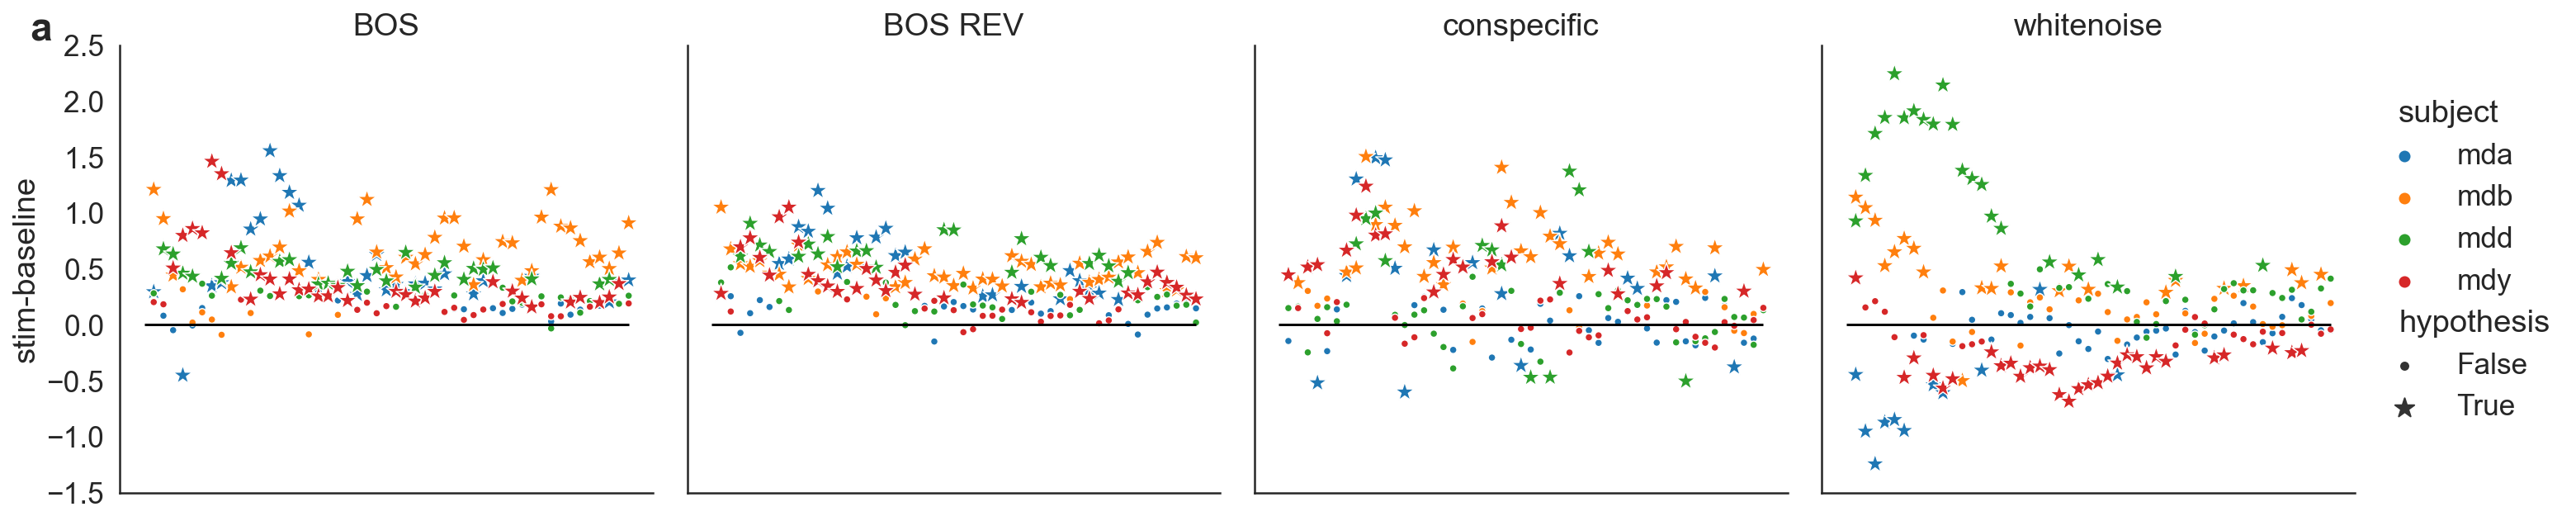

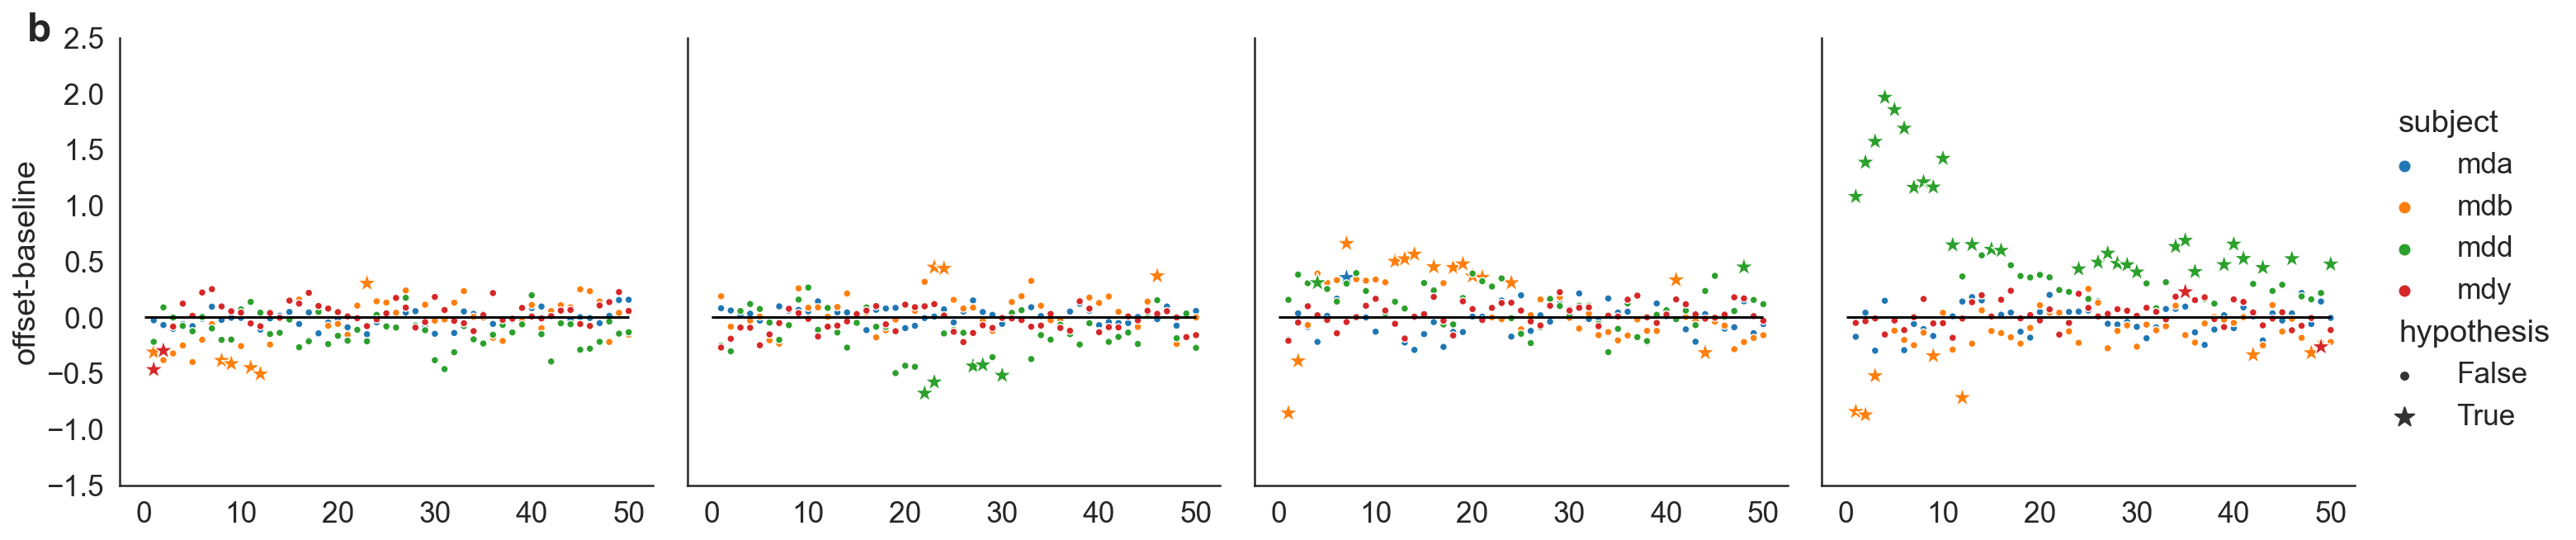

In [16]:
with sns.plotting_context("notebook", font_scale=1.6):
    sns.set_style('white')
    kwargs = {
        'kind':'scatter', 'x':'frequency', 'col':'stimulus',
        'hue':'subject', 'style':'hypothesis', 'markers':{0:'.',1:'*'},
        'size':'hypothesis', 'sizes':{0:80, 1:150}
    }

    g1 = sns.relplot(data=piv_df_hypotheses_pre, **kwargs, y='pre_compare')
    # g2 = sns.relplot(data=piv_df_hypotheses_post, **kwargs, y='post_compare')
    # piv_df_hypotheses_baseline['hyp'] = piv_df_hypotheses_baseline['p'] < 0.05
    g3 = sns.relplot(data=piv_df_hypotheses_baseline, **kwargs, y='baseline_compare')

    for row_i, (subfig_label, g) in enumerate(zip(['a','b'],[g1, g3])):
        curr_ax = g.axes[0][0]
        xlim = curr_ax.get_xlim()
        ylim = curr_ax.get_ylim()
        y_scale = 0.2 if row_i>0 else 0.1
        curr_ax.text(
            xlim[0] - (xlim[1]-xlim[0]) * 0.15,
            ylim[1] + (ylim[1]-ylim[0]) * y_scale,
            subfig_label, fontsize=24, fontweight='bold',
            va='top', ha='right')

        if g != g1:
            g.set(title="")
        if g != g3:
            g.set(xticklabels=[], xticks=[], xlabel=None)

        axes = g.axes
        for ax in axes.flatten():

            ax.hlines(0, 0, 50, "k")

        # Set title for top row
        if g == g1:
            axes[0][0].set_title('BOS')
            axes[0][1].set_title('BOS REV')
            axes[0][2].set_title('conspecific')
            axes[0][3].set_title('whitenoise')

            axes[0][0].set_ylabel('stim-baseline')
        else:
            axes[0][0].set_ylabel('offset-baseline')

        # Set xlabels for the bottom row
        if g == g3:
            # [axes[0][i].set_xlabel('Frequency (Hz)') for i in range(4)]
            [axes[0][i].set_xlabel('') for i in range(4)]

        # Set ylabels for the first channel
        axes[0][0].set_ylabel(axes[0][0].get_ylabel().split('_')[0])

        for i, ax_row in enumerate(axes):
            for ax in ax_row:
                ax.set_ylim(-1.5,2.5)

***
## Initially compare as above, but next compare the actual values next.

In [17]:
# Take log power
soc_context_df['log power'] = np.log(soc_context_df['power'])

# Pivot up periods
piv_soc_context_df = soc_context_df.pivot_table(values='log power', columns='period', index=['subject','frequency','stimulus','stimulus_index','context','date']).reset_index()

# Compare
piv_soc_context_df['pre_compare'] = piv_soc_context_df['during'] - piv_soc_context_df['pre']
piv_soc_context_df['post_compare'] = piv_soc_context_df['during'] - piv_soc_context_df['post']
piv_soc_context_df['baseline_compare'] = piv_soc_context_df['pre'] - piv_soc_context_df['post']

In [18]:
# hypothesis test for pre and during
# initialize p values
def run_hypothesis_tests_across_context(df_in, baseline_col, effect_col, alpha=0.01, num_reps=2500):
    ''' '''
    # Set initial p values
    df_in.loc[:,'p'] = 0

    # Subdivide by date, then stimulus, then context, then frequency.
    for date in tqdm.tqdm(df_in['date'].unique()):
        for stimulus in df_in['stimulus'].unique():
            for context in df_in['context'].unique():
                for frequency in df_in['frequency'].unique():

                    # Get subdf for that subset
                    subdf = df_in.loc[(
                          (df_in['date'] == date)
                        & (df_in['stimulus'] == stimulus)
                        & (df_in['context'] == context)
                        & (df_in['frequency'] == frequency)
                    ), :]

                    # Get baseline and effect columns (usuall a pre/post and during)
                    baseline, effect = subdf[baseline_col].values, subdf[effect_col].values

                    # Get permutation replicates
                    perm_reps = draw_perm_reps(effect,baseline, mean_diff, size=num_reps)

                    # How often are these values as extreme as the empirical value?
                    # Dynamically tailed
                    if np.mean(effect-baseline) > 0:
                        p = np.sum(perm_reps >= np.mean(effect-baseline)) / len(perm_reps)
                    else:
                        p = np.sum(perm_reps <= np.mean(effect-baseline)) / len(perm_reps)

                    df_in.loc[(
                          (df_in['date'] == date)
                        & (df_in['stimulus'] == stimulus)
                        & (df_in['context'] == context)
                        & (df_in['frequency'] == frequency)), 'p'] = p

                    df_in.loc[(
                          (df_in['date'] == date)
                        & (df_in['stimulus'] == stimulus)
                        & (df_in['context'] == context)
                        & (df_in['frequency'] == frequency)), 'hyp'] = p < alpha

    # Add hypothesis test results
    df_in = df_in.groupby(['date','frequency','stimulus','context']).agg(np.mean).reset_index()
    df_in['hyp'] = df_in['p'] < alpha
    return df_in

In [19]:
piv_sc_hyp_pre = run_hypothesis_tests_across_context(piv_soc_context_df, baseline_col='pre', effect_col='during')
piv_sc_hyp_post = run_hypothesis_tests_across_context(piv_soc_context_df, baseline_col='post', effect_col='during')
piv_sc_hyp_baseline = run_hypothesis_tests_across_context(piv_soc_context_df, baseline_col='post', effect_col='pre')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
alpha = 0.01
piv_sc_hyp_pre['hyp'] = piv_sc_hyp_pre['p'] < alpha
piv_sc_hyp_post['hyp'] = piv_sc_hyp_post['p'] < alpha
piv_sc_hyp_baseline['hyp'] = piv_sc_hyp_baseline['p'] < alpha

Hue is context. Two dates are plotted over each other.
Represents tests of the hypothesis that the effect and baseline are the same. Compares difference values of social and solitary together. Following graph visualizes differences between social and solitary.

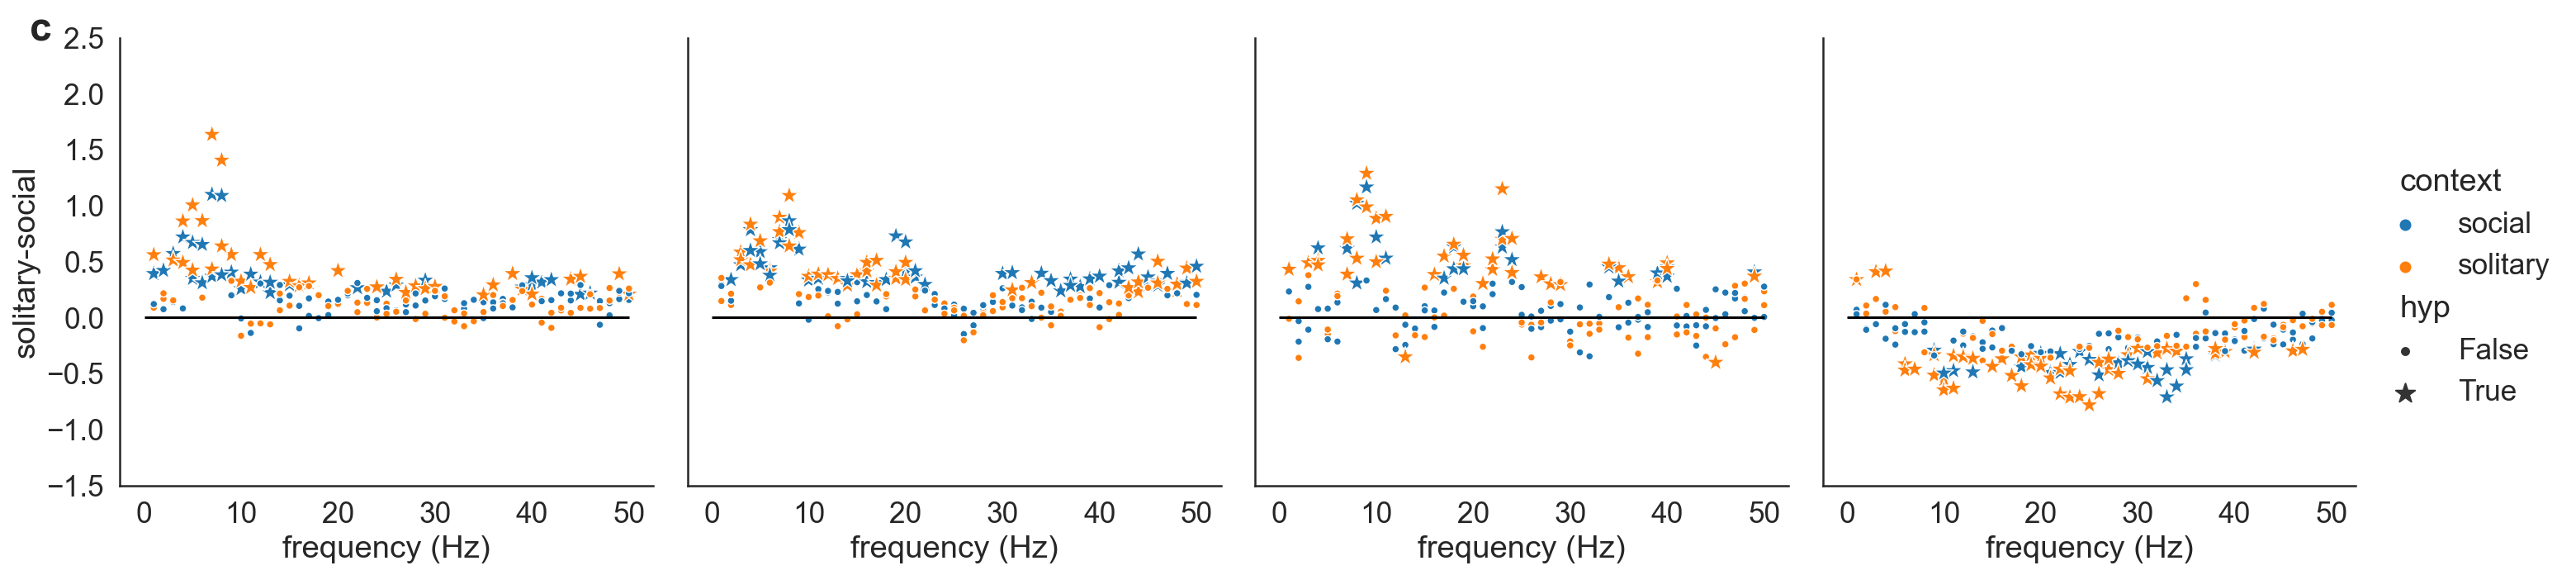

In [21]:
with sns.plotting_context("notebook", font_scale=1.6):
    sns.set_style('white')
    kwargs = {
        'kind':'scatter', 'x':'frequency', 'col':'stimulus',
        'hue':'context', 'style':'hyp', 'markers':{0:'.',1:'*'},
        'size':'hyp', 'sizes':{0:80, 1:150}
    }

    g1 = sns.relplot(data=piv_sc_hyp_pre, **kwargs, y='pre_compare')
    # g2 = sns.relplot(data=piv_sc_hyp_post, **kwargs, y='post_compare')
    # g3 = sns.relplot(data=piv_sc_hyp_baseline, **kwargs, y='baseline_compare')

    for g in [g1]: #, g2, g3]:
        if g != g1:
            g.set(title='')
        # if g!=g3:
        #     g.set(xticklabels=[], xticks=[], xlabel=None)

        curr_ax = g.axes[0][0]
        curr_ax.text(
            xlim[0] - (xlim[1]-xlim[0]) * 0.15,
            ylim[1] + (ylim[1]-ylim[0]) * y_scale,
            "c", fontsize=24, fontweight='bold',
            va='top', ha='right')
        curr_ax.set_ylabel("solitary-social")

        # Get axes
        axes = g.axes
        for ax in axes.flatten():
            ax.hlines(0, 0, 50, "k")

        # Set title for top row
        if g == g1:
            # axes[0][0].set_title('BOS')
            # axes[0][1].set_title('BOS REV')
            # axes[0][2].set_title('conspecific')
            # axes[0][3].set_title('whitenoise')
            axes[0][0].set_title('')
            axes[0][1].set_title('')
            axes[0][2].set_title('')
            axes[0][3].set_title('')

        # Set xlabels for the bottom row
        if g == g1:
            [axes[0][i].set_xlabel('frequency (Hz)') for i in range(4)]

        # Set ylabels for the first channel
        axes[0][0].set_ylabel(axes[0][0].get_ylabel().split('_')[0])

        # Set xlims
        for ax_row in axes:
            for ax in ax_row:
                ax.set_ylim(-1.5,2.5)

Note that the blue portion of these data showed up in red before. We left out the social component of these data. When we include it, it seems like there is a pattern. Let's dive into it a little further.

### Define hypothesis test
**Null hypothesis**: Solitary and social distributions are the same. Independent for each frequency.

**Test statistic**: Mean difference between solitary and social relative values. Relative values are defined as difference between baseline (pre or post) and effect (during).

**Simulation procedure**: Permutation test, for n solitary values and m social values, we concatenate and permute them 1000 times, and take the mean of the first n and last m values. If the difference is at least as extreme as the empirical difference less than 5% of the time, we reject the null hypothesis for that frequency, stimulus, and date.

**Significance level**: 5%

In [22]:
# There are some nas
pivpiv_scdf = piv_soc_context_df.pivot_table(
    values=['pre_compare', 'post_compare', 'baseline_compare'],
    columns='context',
    index=['subject','frequency','stimulus','stimulus_index','date']
).reset_index().dropna()

# np.sum(piv_soc_context_df.isna()), np.sum(pivpiv_scdf.isna())

In [23]:
def run_hypothesis_tests_within_contexts(df_in, baseline_col, effect_col, alpha=0.01, num_reps=10000):
    '''Only difference is that instead of subject it is date. TODO: unify these three functions! '''
    df_in.loc[:,'p'] = 0
    for date in tqdm.tqdm(df_in['date'].unique()):
        for stimulus in tqdm.tqdm(df_in['stimulus'].unique()):
            for frequency in df_in['frequency'].unique():
                subdf = df_in.loc[((df_in['date'] == date)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)), :]

                baseline, effect = subdf[baseline_col].values, subdf[effect_col].values
                perm_reps = draw_perm_reps(effect,baseline, mean_diff, size=num_reps)

                # How often are these values as extreme as the empirical value?
                # Dynamically tailed
                if np.mean(effect-baseline) > 0:
                    p = np.sum(perm_reps >= np.mean(effect-baseline)) / len(perm_reps)
                else:
                    p = np.sum(perm_reps <= np.mean(effect-baseline)) / len(perm_reps)

                df_in.loc[((df_in['date'] == date)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)), 'p'] = p
                df_in.loc[((df_in['date'] == date)
                    & (df_in['frequency'] == frequency)
                    & (df_in['stimulus'] == stimulus)), 'hyp'] = p < alpha

    df_in = df_in.groupby(['date','frequency','stimulus']).agg(np.mean).reset_index()
    df_in['hyp'] = df_in['p'] < alpha
    return df_in

In [24]:
ALPHA = 0.1
# I need to pass a tuple because the data values we want are multiindexed.
#####
# Pre
piv_df_hyp2_pre = run_hypothesis_tests_within_contexts(
    pivpiv_scdf.loc[:,['pre_compare','frequency','stimulus','date']],
    baseline_col=('pre_compare','solitary'),
    effect_col=('pre_compare','social'),
    alpha=ALPHA
)
# Fiddle with the columns
piv_df_hyp2_pre['context difference'] = piv_df_hyp2_pre[('pre_compare','social')] - piv_df_hyp2_pre[('pre_compare','solitary')]
piv_df_hyp2_pre.columns = piv_df_hyp2_pre.columns.get_level_values(0)
piv_df_hyp2_pre['period']='pre'


######
# Post
piv_df_hyp2_post = run_hypothesis_tests_within_contexts(
    pivpiv_scdf.loc[:,['post_compare','frequency','stimulus','date']],
    baseline_col=('post_compare','solitary'),
    effect_col=('post_compare','social'),
    alpha=ALPHA
)
piv_df_hyp2_post['context difference'] = piv_df_hyp2_post[('post_compare','social')] - piv_df_hyp2_post[('post_compare','solitary')]
piv_df_hyp2_post.columns = piv_df_hyp2_post.columns.get_level_values(0)
piv_df_hyp2_post['period']='post'



######
# Baseline
piv_df_hyp2_BL = run_hypothesis_tests_within_contexts(
    pivpiv_scdf.loc[:,['baseline_compare','frequency','stimulus','date']],
    baseline_col=('baseline_compare','solitary'),
    effect_col=('baseline_compare','social'),
    alpha=ALPHA
)
piv_df_hyp2_BL['context difference'] = piv_df_hyp2_BL[('baseline_compare','social')] - piv_df_hyp2_BL[('baseline_compare','solitary')]
piv_df_hyp2_BL.columns = piv_df_hyp2_BL.columns.get_level_values(0)
piv_df_hyp2_BL['period']='baseline'


# Keeps extra columns which are vestigial, makes concatenation hard
del piv_df_hyp2_pre['pre_compare']
del piv_df_hyp2_post['post_compare']
del piv_df_hyp2_BL['baseline_compare']

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

c:\Users\danpo\Anaconda3\envs\SocialContextNCM\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


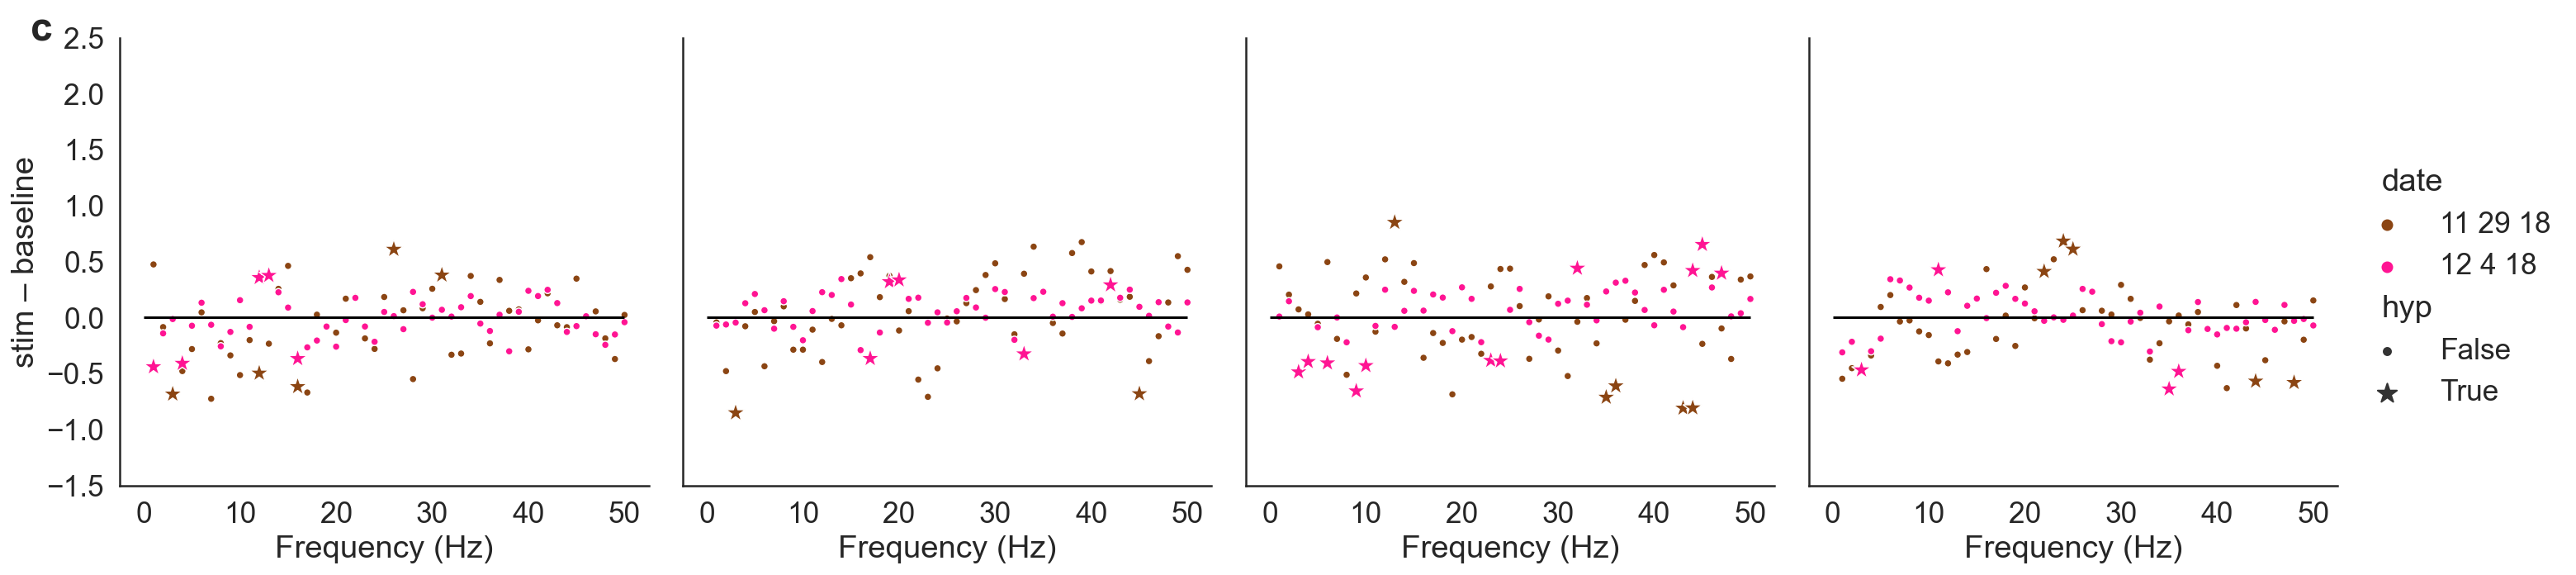

In [39]:
piv_df_hyp2_pre['period']='pre'
piv_df_hyp2_post['period']='post'
piv_df_hyp2_BL['period']='baseline'
piv_df_hyp2_pre['hyp']=piv_df_hyp2_pre.p < 0.05
piv_df_hyp2_post['hyp']=piv_df_hyp2_post.p < 0.05
piv_df_hyp2_BL['hyp']=piv_df_hyp2_BL.p < 0.05

piv_df_hyp2 = piv_df_hyp2_pre # pd.concat([piv_df_hyp2_pre, piv_df_hyp2_post, piv_df_hyp2_BL])

with sns.plotting_context("notebook", font_scale=1.6):

    sns.set_style('white')
    kwargs = {
        'kind':'scatter', 'x':'frequency', 'col':'stimulus','row':'period',
        'hue':'date', 'palette':{'11 29 18':'saddlebrown', '12 4 18':'deeppink'},
        'style':'hyp', 'markers':{0:'.',1:'*'}, 'size':'hyp', 'sizes':{0:80, 1:150},
    }

    g1 = sns.relplot(data=piv_df_hyp2, **kwargs, y='context difference')

    for row, (ax_row, title) in enumerate(zip(g1.axes, ["stim – baseline", "stim – offset", "offset – baseline"])):
        ax_row[0].set_ylabel(title)
        ax_row[0].text(
            xlim[0] - (xlim[1]-xlim[0]) * 0.15,
            ylim[1] + (ylim[1]-ylim[0]) * y_scale,
            "c", fontsize=24, fontweight='bold',
            va='top', ha='right')
        
        for ax in ax_row:
            ax.set_ylim((-1.5, 2.5))
            ax.hlines(0, 0, 50, "k")
            if row == 0:
                title_text = ax.get_title()
                ax.set_title("") # ax.set_title(title_text.split(" = ")[-1])
            else:
                ax.set_title("")

            # if row == 2:
            ax.set_xlabel("Frequency (Hz)")


This is why a high significance level for the social effects reveals effects that more stringent significance levels do not. The peak is between 0.05 and 0.1.

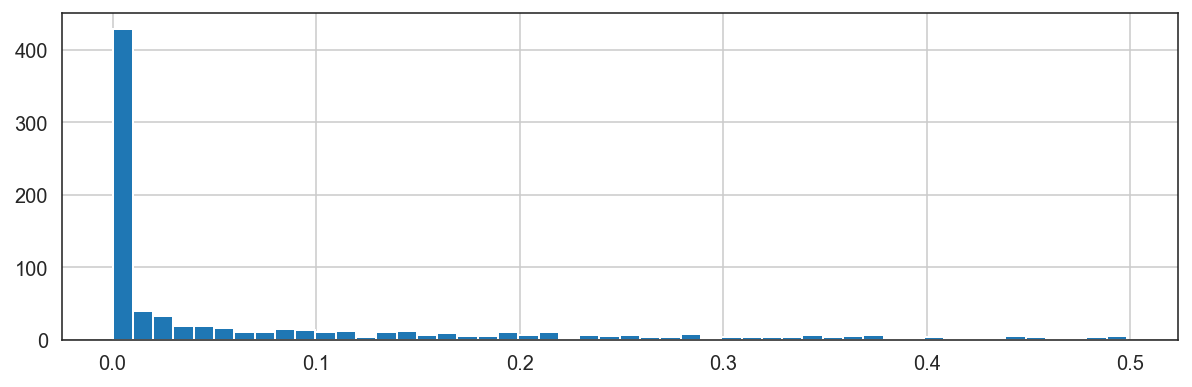

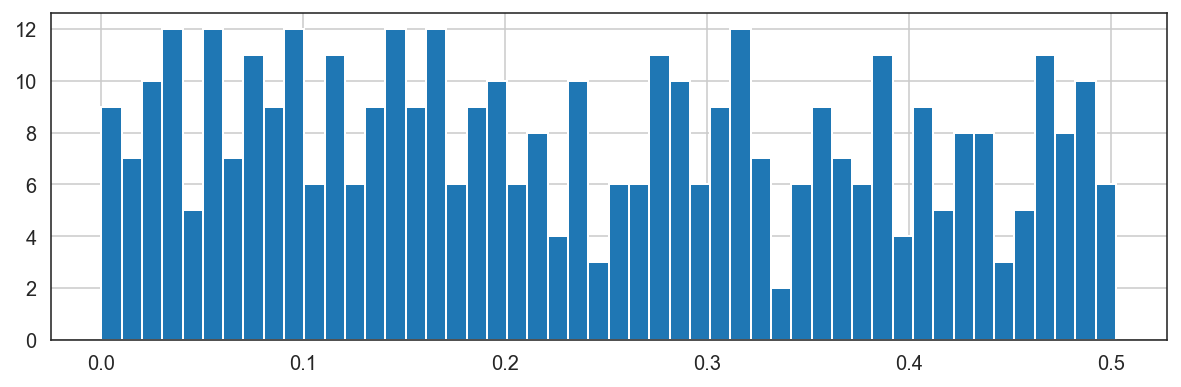

In [26]:
piv_df_hypotheses_pre.p.hist(bins=50,figsize=(10,3))
plt.figure()
piv_df_hyp2.p.hist(bins=50, figsize=(10,3));

If we can get a few recordings where we have LFP data for them AS WELL AS single unit data for them, we can do an analysis of how power changes AT EACH FREQUENCY for EACH STIMULUS PRESENTATION, if they covary (plot it), we can actually test (maybe) the relation between BS neurons and LFP activity.

In [27]:
# %load_ext watermark
# %watermark -v -p numpy,pandas,scipy,matplotlib,seaborn,jupyterlab